#**Linear Algebra**

###**Midterms Project**

*Coded and submitted by:* <br>
*Joaquin, Chris C.* <br>
*201913392* <br>
*58010* <br>


Directions This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic.



*   Provide all necessary explanations for specific code blocks.
*   Provide illustrations for key results.

*   Observe clean code (intuitive variable names, proper commenting, proper code spacing)
*   Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score.

###**Case**
Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

###**Problem**
State and explain Bebang's problem here and provide the deliverables.

#**Proof of Concept**

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the pandas library for this. For more information you can look into their documentation here.




In [ ]:
## for df_prices
##uploaded = files.upload()

In [ ]:
##for fn in uploaded.keys():
  ##print('User uploaded file "{name}" with length {length} bytes'.format(
      ##name=fn, length=len(uploaded[fn])))

In [ ]:
##uploaded

In [ ]:
##import io

In [ ]:
##df_prices = pd.read_csv(io.StringIO(uploaded['bebang prices.csv'].decode('utf-8')))


In [ ]:
##df_prices

In [ ]:
## For df_sales
##uploaded1 = files.upload()

In [ ]:
##for fn in uploaded1.keys():
  ##print('User uploaded file "{name}" with length {length} bytes'.format(
      ##name=fn, length=len(uploaded1[fn])))

In [ ]:
##uploaded1

In [ ]:
##import io

In [ ]:
##df_sales = pd.read_csv(io.StringIO(uploaded1['bebang sales.csv'].decode('utf-8')))

In [ ]:
##df_sales

In [1]:
import pandas as pd
from google.colab import files

In [2]:
## Saving those files here to view datas in this notebook.
file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [3]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


##**Part 1: Monthly Sales**

In [6]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
Prices_mat = np.array(df_prices)[0] ## reshape this vector to the appropriate size
prices_mat = Prices_mat.reshape((12,1)) ##Reshaping it using np.reshape() function. 
Costs_mat = np.array(df_prices)[1] ## reshape this vector to the appropriate size
costs_mat = Costs_mat.reshape((12,1)) ##Reshaping it using np.reshape() function.


## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)



Formulas
Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ 
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [16]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sales_mat * prices_mat ## I follow the operations given from the description.
    monthly_costs = sales_mat * costs_mat
    profits = monthly_revenue - monthly_costs     
    
    return monthly_revenue.flatten(), monthly_costs.flatten(), profits.flatten()

In [17]:
### Do not alter this cell
month_rev, month_cost, profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values

In [19]:
month_rev, month_cost, profit ##The printed values.

(array([ 27335,  18340,  12740,   5495,  31290,   1960,   3115,   1435,
           805,   2730,   8085,  31465,   5250,   8100,   8600,    800,
          3075,     25,     75,      0,     25,    150,   7800,  13700,
         11980,  13480,  17080,    280,   9340,   1560,    720,    960,
          1500,   1960,  15620,  32040,   4340,   3920,   3990,    805,
          6930,    420,   1120,   1435,    805,   1260,  10500,  19810,
         32250,  24900,  44250,   4900,   8850,   4900,   2150,   4800,
          1300,   3550,  27450,  44850,   8400,  14880,  14760,   3120,
          6520,   1040,   1800,    880,   2160,   1640,   8280,  18240,
         39240,  15200,   6160,    560,   5880,    600,   3920,   1320,
           920,   1440,  22080,  25320,  21510,  20790,  15930,   2205,
          4005,      0,     45,      0,     45,    360,  15075,   9630,
         17940,   6090,   1080,   2880,  23670,    120,    150,      0,
           240,      0,  23670,  13740,  12960,   4920,   1920, 

In [44]:
#Monthly Profit
##I used np.sum() function to add every elements. 
jan_profits = np.sum(profit[0::12]) ##I used this to add in every 12 element in the given array. Likewise to other codes. 
print(f'The profit for the month of January is: {jan_profits}Php')
feb_profits = np.sum(profit[1::12])
print(f'The profit for the month of February is: {feb_profits}Php')
mar_profits = np.sum(profit[2::12])
print(f'The profit for the month of March is: {mar_profits}Php')
apr_profits = np.sum(profit[3::12])
print(f'The profit for the month of April is: {apr_profits}Php')
may_profits = np.sum(profit[4::12])
print(f'The profit for the month of May is: {may_profits}Php')
june_profits = np.sum(profit[5::12])
print(f'The profit for the month of June is: {june_profits}Php')
july_profits = np.sum(profit[6::12])
print(f'The profit for the month of July is: {july_profits}Php')
aug_profits = np.sum(profit[7::12])
print(f'The profit for the month of August is: {aug_profits}Php')
sept_profits = np.sum(profit[8::12])
print(f'The profit for the month of September is: {sept_profits}Php')
oct_profits = np.sum(profit[9::12])
print(f'The profit for the month of October is: {oct_profits}Php')
nov_profits = np.sum(profit[10::12])
print(f'The profit for the month of November is: {nov_profits}Php')
dec_profits = np.sum(profit[11::12])
print(f'The profit for the month of December is: {dec_profits}Php')

The profit for the month of January is: 79371Php
The profit for the month of February is: 59208Php
The profit for the month of March is: 53850Php
The profit for the month of April is: 10001Php
The profit for the month of May is: 52824Php
The profit for the month of June is: 5527Php
The profit for the month of July is: 5598Php
The profit for the month of August is: 5498Php
The profit for the month of September is: 5034Php
The profit for the month of October is: 7213Php
The profit for the month of November is: 76548Php
The profit for the month of December is: 117156Php


##**Part 2: Flavor Sales**

In [29]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = sales_mat * prices_mat ##Same formulas I used.
    flavor_costs = sales_mat * costs_mat
    flavor_profits = flavor_revenue - flavor_costs  
    return flavor_profits.flatten()


In [31]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values
flavor_profit

array([ 7810,  5240,  3640,  1570,  8940,   560,   890,   410,   230,
         780,  2310,  8990,  2100,  3240,  3440,   320,  1230,    10,
          30,     0,    10,    60,  3120,  5480,  5990,  6740,  8540,
         140,  4670,   780,   360,   480,   750,   980,  7810, 16020,
        1860,  1680,  1710,   345,  2970,   180,   480,   615,   345,
         540,  4500,  8490,  9675,  7470, 13275,  1470,  2655,  1470,
         645,  1440,   390,  1065,  8235, 13455,  1890,  3348,  3321,
         702,  1467,   234,   405,   198,   486,   369,  1863,  4104,
        9810,  3800,  1540,   140,  1470,   150,   980,   330,   230,
         360,  5520,  6330,  9560,  9240,  7080,   980,  1780,     0,
          20,     0,    20,   160,  6700,  4280,  8970,  3045,   540,
        1440, 11835,    60,    75,     0,   120,     0, 11835,  6870,
        4860,  1845,   720,   480,   975,  1110,  1170,   675,  1335,
        1500,  9480,  3465,  5954,  5356,  1014,  1014,  1014,    91,
          39,   104,

In [46]:
#Flavor Profit in a year
F1 = np.sum(flavor_profit[0:12]) ##same method I used yet the diff. is getting only the sum from the span of every 12 elements. 
print(f'The profit for red velvet for the whole year is: {F1}Php')
F2 = np.sum(flavor_profit[12:24])
print(f'The profit for oreo for the whole year is: {F2}Php')
F3 = np.sum(flavor_profit[24:36])
print(f'The profit for sugar glared for the whole year is: {F3}Php')
F4 = np.sum(flavor_profit[36:48])
print(f'The profit for almond honey for the whole year is: {F4}Php')
F5 = np.sum(flavor_profit[48:60])
print(f'The profit for matcha for the whole year is: {F5}Php')
F6 = np.sum(flavor_profit[60:72])
print(f'The profit for strawberry cream for the whole year is: {F6}Php')
F7 = np.sum(flavor_profit[72:84])
print(f'The profit for brown sugar boba for the whole year is: {F7}Php')
F8 = np.sum(flavor_profit[84:96])
print(f'The profit for fruits and nuts for the whole year is: {F8}Php')
F9 = np.sum(flavor_profit[96:108])
print(f'The profit for dark chocolate for the whole year is: {F9}Php')
F10 = np.sum(flavor_profit[108:120])
print(f'The profit for chocolate and orange for the whole year is: {F10}Php')
F11 = np.sum(flavor_profit[120:132])
print(f'The profit for choco mint for the whole year is: {F11}Php')
F12 = np.sum(flavor_profit[132:144])
print(f'The profit for choco butter naught for the whole year is: {F12}Php')


The profit for red velvet for the whole year is: 41370Php
The profit for oreo for the whole year is: 19040Php
The profit for sugar glared for the whole year is: 53260Php
The profit for almond honey for the whole year is: 23715Php
The profit for matcha for the whole year is: 61245Php
The profit for strawberry cream for the whole year is: 18387Php
The profit for brown sugar boba for the whole year is: 30660Php
The profit for fruits and nuts for the whole year is: 39820Php
The profit for dark chocolate for the whole year is: 44790Php
The profit for chocolate and orange for the whole year is: 27615Php
The profit for choco mint for the whole year is: 26156Php
The profit for choco butter naught for the whole year is: 91770Php


In [70]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
F_profits = [                      
             ('red velvet',F1),
             ('oreo',F2),
             ('sugar glared',F3),
             ('almond honey',F4),
             ('matcha',F5),
             ('strawberry cream',F6),
             ('brown sugar boba',F7),
             ('Fruits and nuts',F8),
             ('dark chocolate',F9),
             ('chocolate and orange',F10),
             ('choco mint',F11),
             ('choco butter naught',F12)
] ##Make a new array.
Best_three_flavors = sorted(F_profits, key=lambda x: x[1], reverse=True)[:3] ## I used sorted() function.
best_selling = []
for best_three_flavors in Best_three_flavors:
  best_selling.append(best_three_flavors [0]) ##I used append() function too. 
print(f'The best selling flavors are:\n{best_selling}\n\n')
Worst_three_flavors = sorted(F_profits, key=lambda x: x[1], reverse=False)[:3]
least_selling = []
for worst_three_flavors in Worst_three_flavors:
  least_selling.append(worst_three_flavors [0])
print(f'The least selling flavors are:\n{least_selling}\n\n')


The best selling flavors are:
['choco butter naught', 'matcha', 'sugar glared']


The least selling flavors are:
['strawberry cream', 'oreo', 'almond honey']




##**Part 3: Visualizing the Data (Optional for +40%)**

You can try to visualize the data in the most comprehensible chart that you can use.




In [74]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

####**Entire Dataset**

<function matplotlib.pyplot.show>

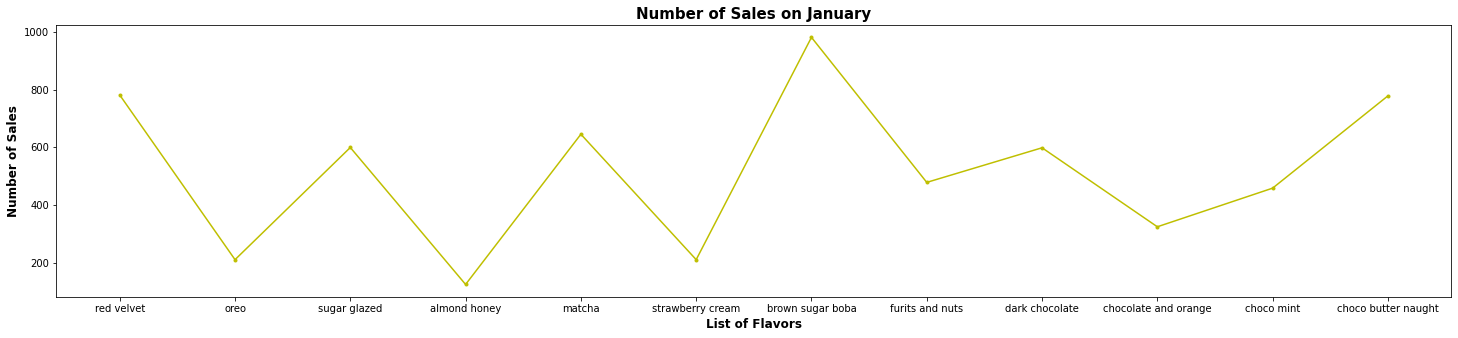

In [104]:
#Datas that came from df_sales.csv
##Checking the number of sales of flavors in every month.
## I used matplotlib 
plt.figure(figsize=(25,5)) #for the figure size overall.

plt.title('Number of Sales on January', fontdict={'fontweight':'bold','fontsize':15}) ##Title of the graph

plt.plot(df_sales.flavor, df_sales.january, 'y.-') ##to get infos from the dataset.

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12}) ##labels.
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show
##Likewise to the rest of the codes for graphs. 


<function matplotlib.pyplot.show>

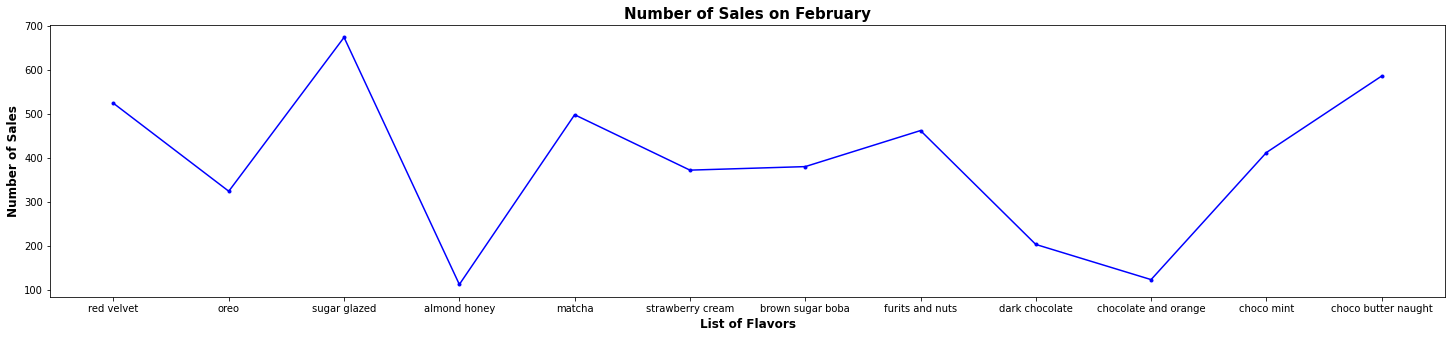

In [105]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on February', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.february, 'b.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

<function matplotlib.pyplot.show>

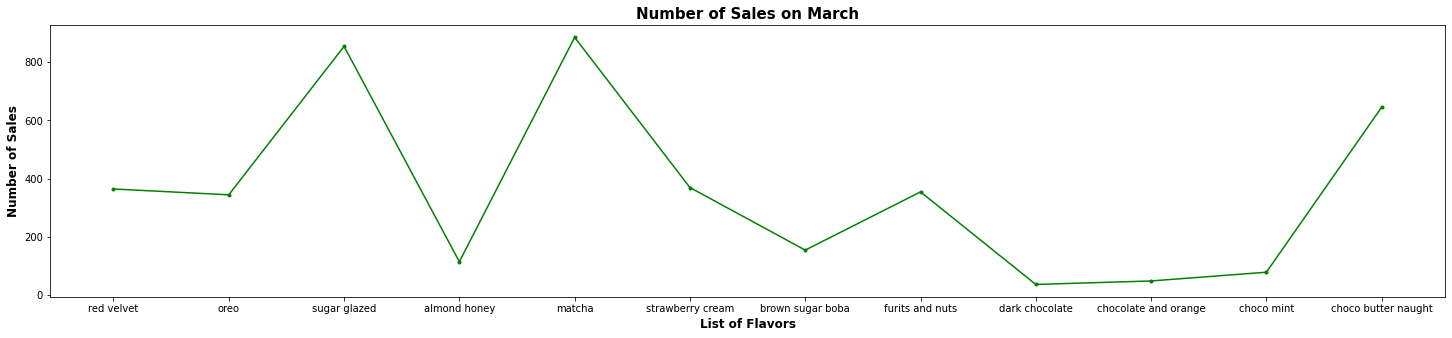

In [110]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on March', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.march, 'g.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

<function matplotlib.pyplot.show>

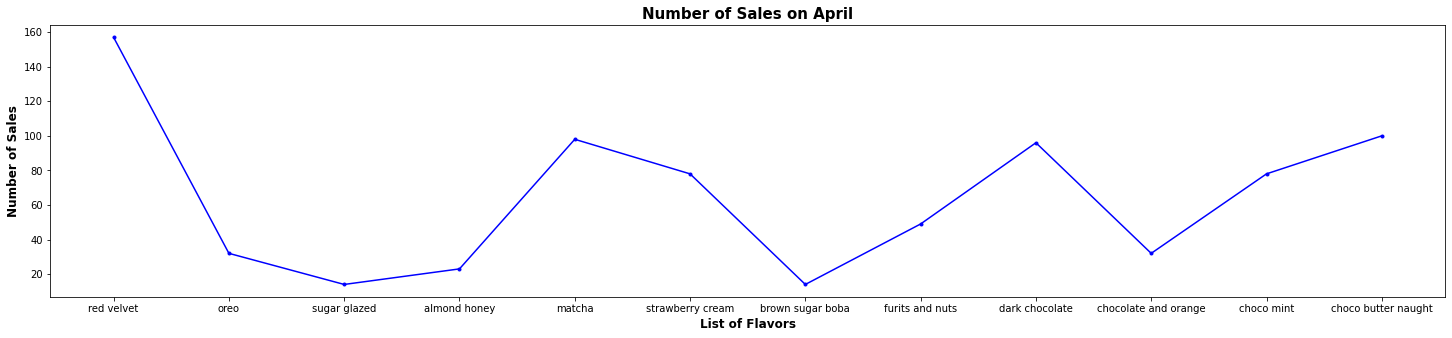

In [111]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on April', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.april, 'b.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

<function matplotlib.pyplot.show>

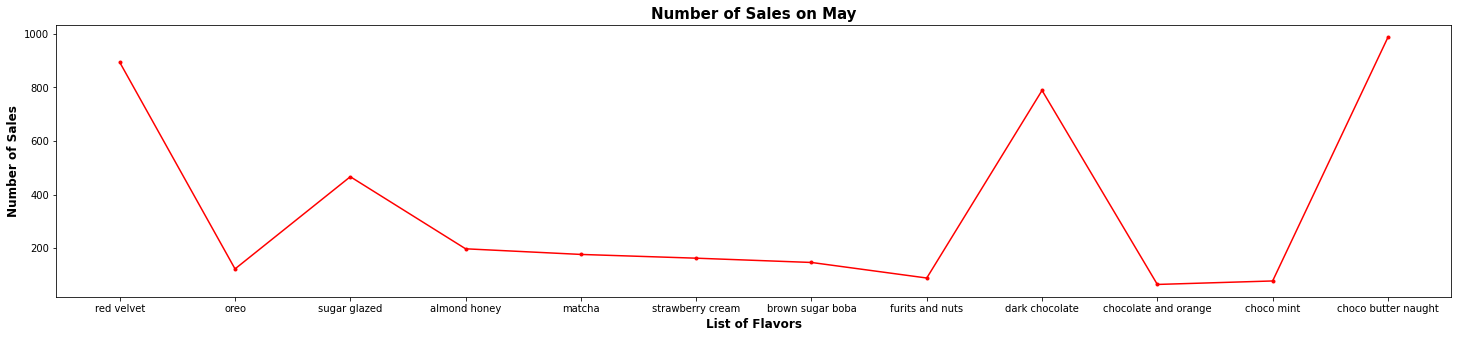

In [122]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on May', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.may, 'r.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

<function matplotlib.pyplot.show>

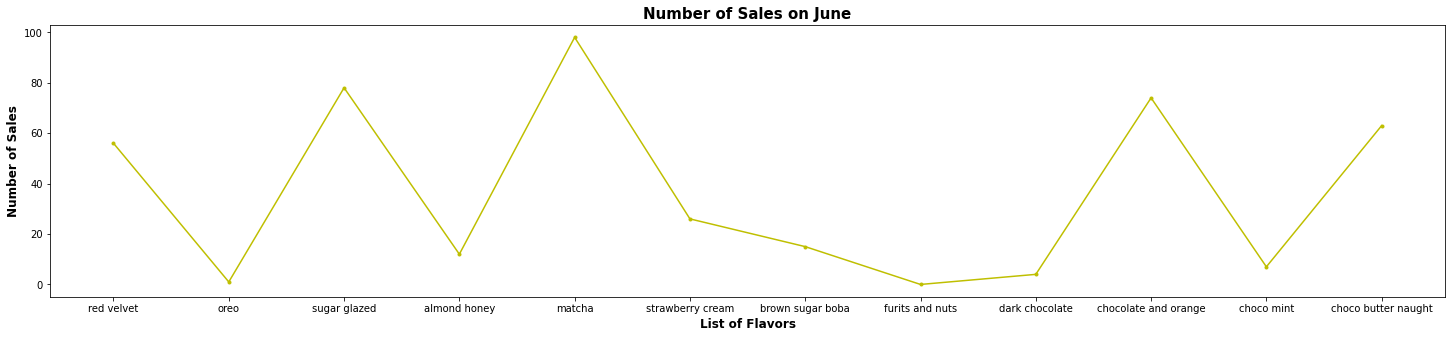

In [114]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on June', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.june, 'y.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

<function matplotlib.pyplot.show>

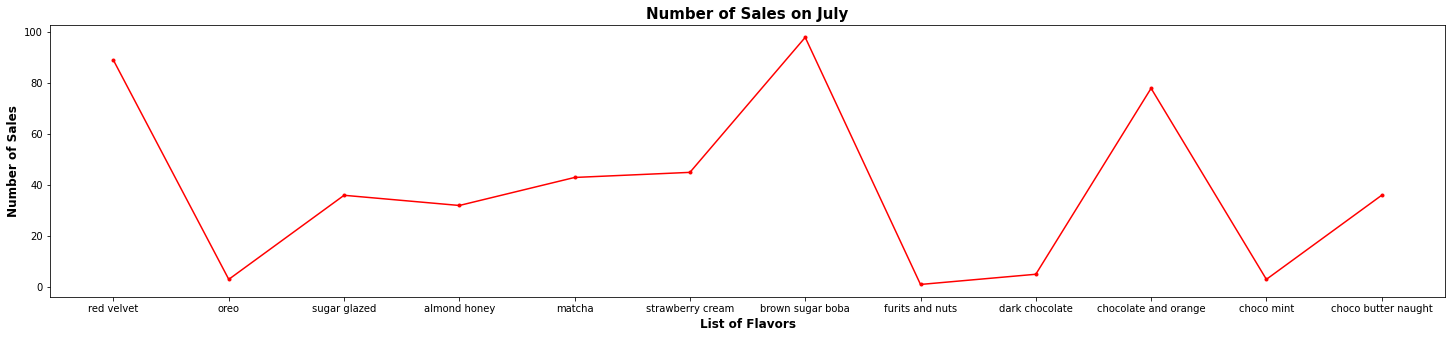

In [115]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on July', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.july, 'r.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

<function matplotlib.pyplot.show>

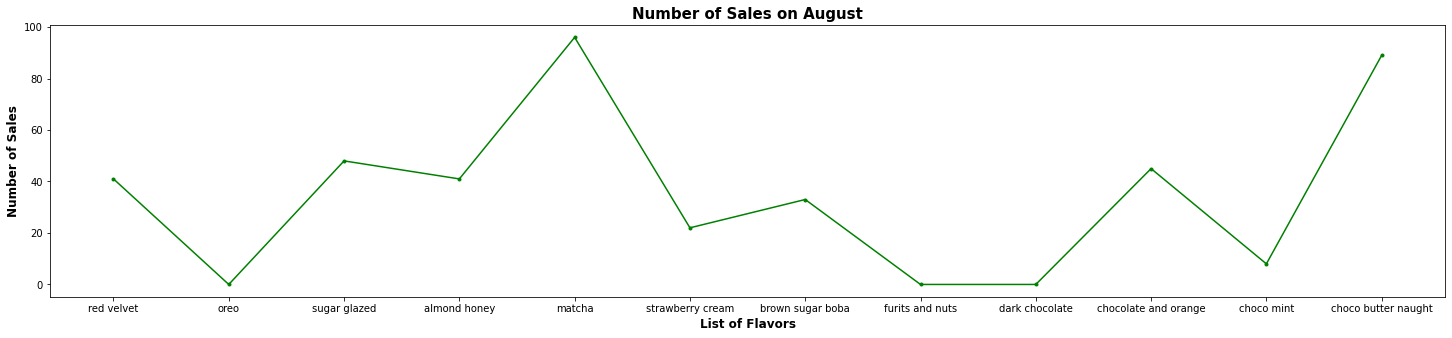

In [116]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on August', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.august, 'g.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

<function matplotlib.pyplot.show>

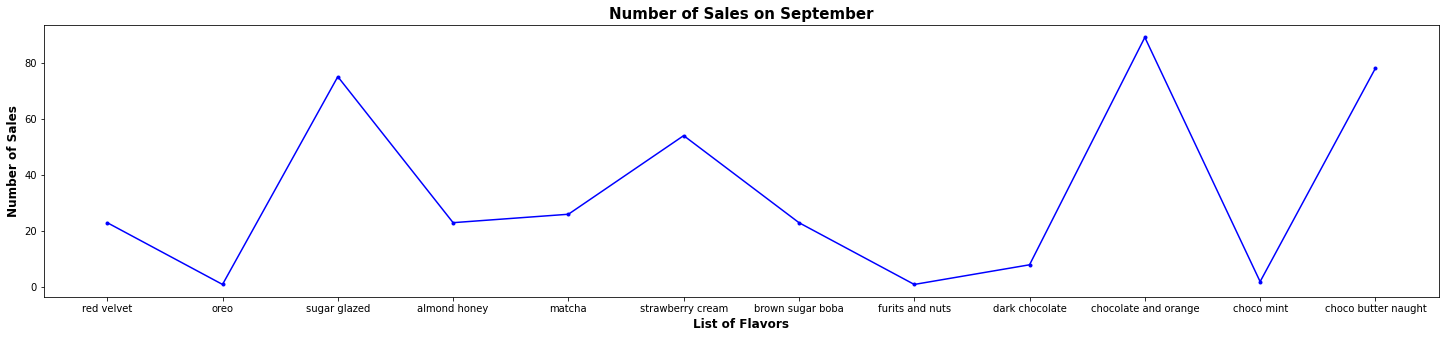

In [117]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on September', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.september, 'b.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

<function matplotlib.pyplot.show>

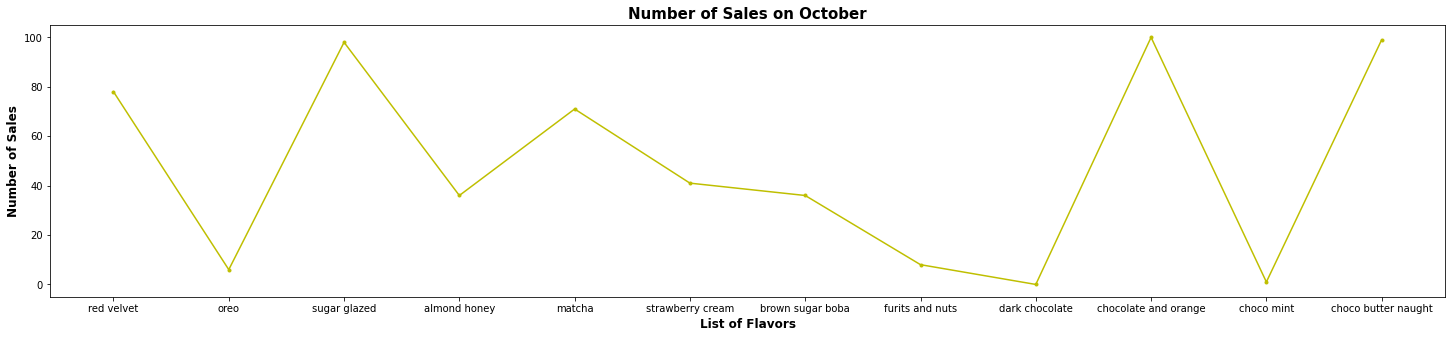

In [118]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on October', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.october, 'y.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

<function matplotlib.pyplot.show>

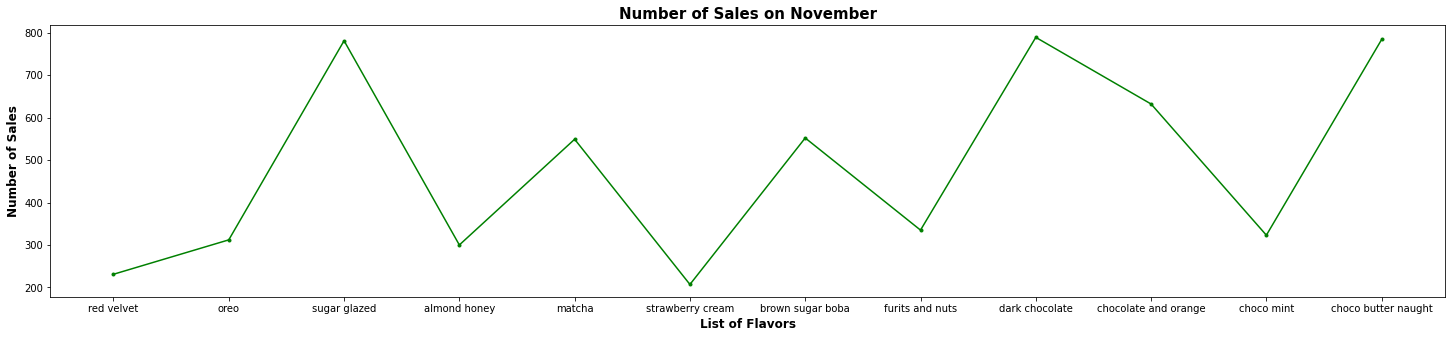

In [119]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on November', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.november, 'g.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

<function matplotlib.pyplot.show>

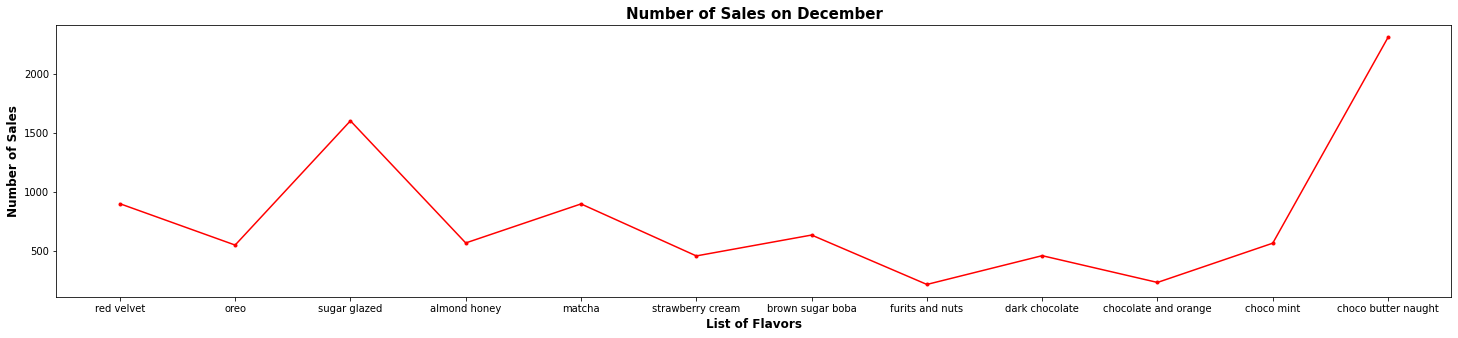

In [120]:
plt.figure(figsize=(25,5))

plt.title('Number of Sales on December', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(df_sales.flavor, df_sales.december, 'r.-')

plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':12})

plt.show

####**Monthly Sales**

<function matplotlib.pyplot.show>

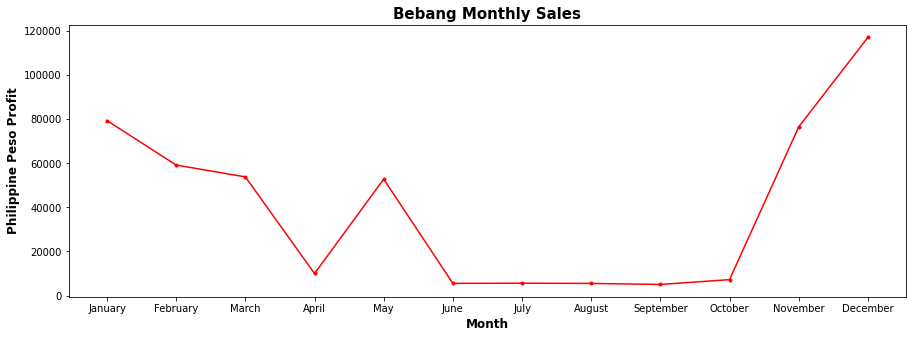

In [91]:
##I created new csv files for monthly sales to plot clearly in the graph.
Bebang_monthly_sales = pd.read_csv('bebang_monthly_sales.csv')

plt.figure(figsize=(15,5))

plt.title('Bebang Monthly Sales', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(Bebang_monthly_sales.MONTH, Bebang_monthly_sales.SALES, 'r.-')

plt.xlabel('Month', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Philippine Peso Profit', fontdict={'fontweight':'bold','fontsize':12})

plt.show


####**Flavor Sales**

<function matplotlib.pyplot.show>

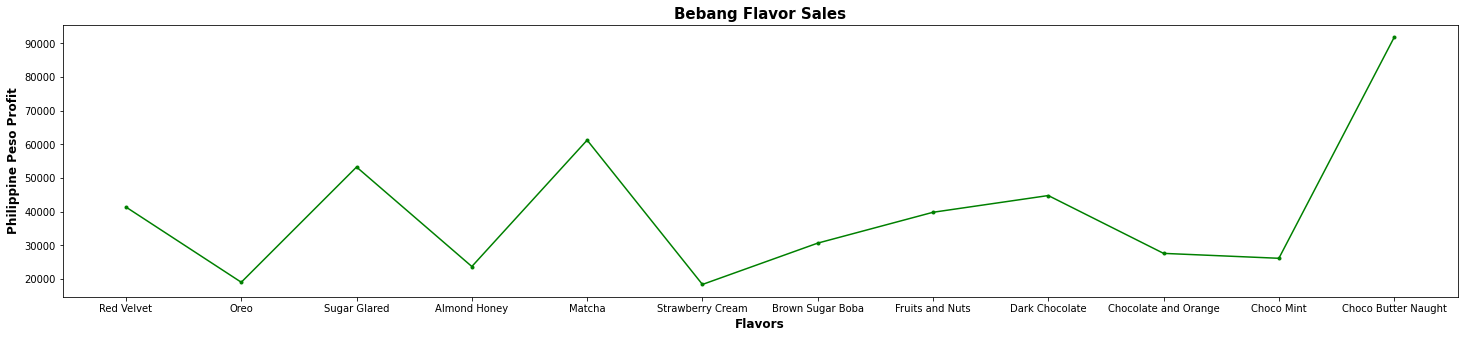

In [96]:
##Likewise. 
Bebang_flavor_sales = pd.read_csv('Bebang_Flavor_Sales.csv')

plt.figure(figsize=(25,5))

plt.title('Bebang Flavor Sales', fontdict={'fontweight':'bold','fontsize':15})

plt.plot(Bebang_flavor_sales.FLAVORS, Bebang_flavor_sales.SALES, 'g.-')

plt.xlabel('Flavors', fontdict={'fontweight':'bold','fontsize':12})
plt.ylabel('Philippine Peso Profit', fontdict={'fontweight':'bold','fontsize':12})

plt.show

##**Part 4: Business Recommendation and Conclusion**

Present the findings of your data analysis and provide recommendations

Based on the data given presented above, The highest profitable sales in a year started from ber months. In the data regarding with the flavors, it visualized what are the best selling flavors and the least selling flavors. With this data, it will help for the business of Bebang because she now know what are the things that she might do to increase her sales in a year. My recommendation in her business is to replace the top three worst flavors into a new flavors. With this, there's a high chance that those new three flavors will be sold automatically for the customers especially to her loyal customer will give it a try to check what is taste like. If she got a ton of stocks with the least selling products, much better to take a risk to decrease its price in order for it to replenish and to replace those flavors as much as possible. It will be more risky if it will not still replenish for nothing will change for the next coming months. 